<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Linear Regression

_Authors:_ Tim Book, Jeff Hale

### Learning Objectives 
- Describe modeling.
- Calculate mean squared error.
- State the assumptions of a linear regression model.
- Be able to interpret the coefficients of a linear regression model.
- Identify the difference between simple and multiple linear regression.
- Fit, generate predictions from, and evaluate a linear regression model in `sklearn`, and maybe in `statsmodels`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imports to build a linear reg model and evaluate it
# to fit a linear reg model
# below imports sklearn 'library's linear_model 'module's LinearRegression 'class'
# fyi, the model that we build with above, will be an 'instance/object' of this LinearRegression class
# we will talk about python Class later in the course
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

# Part I: Simple Linear Regression

When you have **1 predictor variable (or in other words, 1 independent variable or 1 feature)** you are doing _simple linear regression_. 

## The Data
Data source: [here](https://www.rdocumentation.org/packages/fpp2/versions/2.3/topics/elecdemand)

The data consists of electricity demand for Victoria, Australia every half-hour in 2014. We have three columns:

* Total electricity demand (in gigawatts)
* Whether or not it is a workday (0/1)
* Temperature (Celcius)

In [2]:
elec = pd.read_csv("../data/elecdemand.csv")

# We'll limit our focus to only days in which it was
# at least 15 degrees Celcius
elec = elec[elec["temp"] > 15]

print(elec.shape)
elec.head()

(9807, 3)


,demand,workday,temp
0,3.914647,0,18.2
1,3.672550,0,17.9
2,3.497539,0,17.6
3,3.339145,0,16.8
4,3.204313,0,16.3


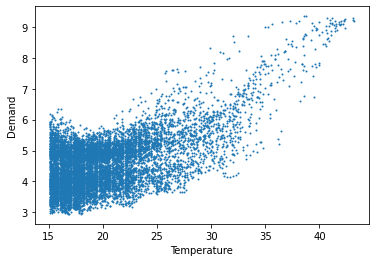

In [3]:
# Plot temperature vs. demand
plt.scatter(elec["temp"], elec["demand"], s=1) # plotting a scatter plot with marker_size = 1 (default 2)
plt.xlabel('Temperature')
plt.ylabel('Demand');

Inference: we see a correlation! which makes sense, that as it gets hotter, the electricity usage increases

## The Null model

<details><summary>(click) If we had to guess the demand for any new temperature (that is, outside the set of values in our dataset) what would you pick?</summary>
We don't have much information yet, so probably just the mean!
</details>

In [4]:
# We don't have much information yet, so probably let's just start with the mean!
elec['demand'].mean()

4.6245247308369555

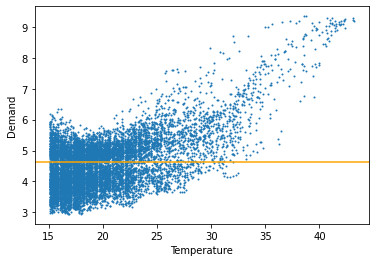

In [5]:
# same plot as above, with added horizontal line to include the mean demand
plt.scatter(elec["temp"], elec["demand"], s=1)
plt.axhline(elec['demand'].mean(), color = 'orange') 
plt.xlabel('Temperature')
plt.ylabel('Demand');

Inference: What! that seems to be way off from the actual correlation the 2 variables actually depict

## How could we improve our model?

<details><summary>(click) If we were to draw a straight line that fit the points the best, what would that look like?</summary>
<img src="../images/ols.png", style="height: 350px">
</details>

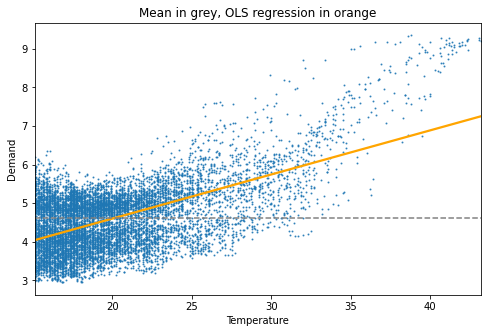

In [6]:
# same plot as above, with added regression fit line

plt.figure(figsize = (8, 5))

# seaborn has a powerful way to plot linear regression fit: regplot() 
# using regplot() to Plot data and a linear regression model fit
# 'ci' is confidence interval is estimated using a bootstrap (subset of the data), default:95% (0.95)
sns.regplot(x='temp', y='demand', data=elec, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})
plt.axhline(elec['demand'].mean(), color = 'grey', ls='--')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.title('Mean in grey, OLS regression in orange');

**Does that new line better fit the data than our old line that was just the mean?**

Looks like it! We'll discuss the formal evaluation metrics in a bit.

## Lines
*(covered in slides)*

This was the equation I learned for a line (sloped-line more precisely, on an x-y axis). Look familiar?
$$ \huge y = mx + b$$
In data science it gets changed to 

$$ \huge  y = \beta_0 + \beta_1 x_1 $$

### Errors
*(covered in slides)*

Our model isn't going to be perfect. The things our model doesn't capture are errors and denoted by $\epsilon$ (epsilon).

$$ \huge y = \beta_0 + \beta_1 x_1 + \epsilon $$

### OLS Regression Modeling

*We have _x_ and we have _y_*. That's our data. The ***actual values*** for the independent and the dependent variables. _y_ is also known as the _target_ variable, while _x_ is a predictor variable.

We *don't have the betas* in the equation above. Our **model** is trying to figure out the best $\beta$ values denoted by the $\hat \beta$ below. 

$$ \huge \hat y = \hat \beta_0 + \hat \beta_1 x_1 $$


$\hat \beta_0$ is the **y-intercept** that our model learns. The point where the line crosses the y-axis (corresponding to x = 0).

$\hat \beta_1$ is the **coefficient** that we multiply by our $x_1$ variable. It's the **slope**. For every 1 unit change in $x_1$, y increases by the value of $\beta1$.

$\hat y$ is the predicted value of our target variable. _(while, y is the ground truth)_

When we have a model that has been fit with the actual data and the $\beta$ computed, we can plug in a new x value and solve for $\hat y$. 

#### $\hat y$ is a prediction! 🎉

#### Real-world application:
- _salary_ is our response 
- _work experience_ is our feature
$$ \huge PredictedSalary = \hat \beta_0 + \hat \beta_1 * work experience$$

- you can think of many many applications at your work and in your real life where linear regression is applicable

---
## OLS regression model in scikit-learn.

### Step 1: Assemble our predictor variables (X) and our target (y) 

 We need an X matrix that is n-by-p.
- n = rows
- p = features

A feature just means a predictor column.

In the simple linear regression case, p = 1. We have one feature ($x_1$). Usually you'll have more than 1 feature - that is *multiple linear regression - later on that topic!* 

In [7]:
# Step 1: Assemble our X and y variables

# We need an X matrix that is n-by-p (in this case, p = 1)
# we are using temp as the feature from above
X = elec[["temp"]]

In [9]:
# X is a subset-dataframe with all values from only 1 column, temp
print(X.shape)
X.head()

(9807, 1)


,temp
0,18.2
1,17.9
2,17.6
3,16.8
4,16.3


#### Why did we make X a DataFrame?
Scikit-learn expects a two dimensional object (that's just the way it is developed, to model). Usually we have more than one predictor variable.

Next - y is the outcome/target variable or *response*

In [9]:
# We need a y vector that is length n (we know this as a Series from past lessons)
# this is again, the required format for the response variable, to enable modeling
y = elec["demand"]

In [10]:
print(y.shape, type(y))
y

(9807,) <class 'pandas.core.series.Series'>


0        3.914647
1        3.672550
2        3.497539
3        3.339145
4        3.204313
           ...   
17515    3.724836
17516    3.761887
17517    3.809415
17518    4.135946
17519    4.217047
Name: demand, Length: 9807, dtype: float64

#### Why is the target a Series or 1D numpy array? 

Scikit-learn supervised learning estimators are expecting a single output column. They predict one value for each observation, generally.

### Step 2: Instantiate the model

In [11]:
# Step 2: Instantiate the linear regression model
# Remember we imported LinearRegression earlier in the notebook!
lr = LinearRegression()

### Step 3: Fit the model

In [12]:
# Step 3: Fit the linear model - this is where the model TRAINING happens!
# expected format is model_instance.fit(features_matrix, response_vector)
lr.fit(X, y)

LinearRegression()

### Step 4: Check out and interpret our model weights

In [13]:
# Take a peek at the model coefficient (Beta_1) and intercept (Beta_0)
# you can get the list of available model weights to choose from if you pressed tab after lr.
print(lr.intercept_)
print(lr.coef_)

2.318762978267358
[0.11415682]


We now have the following model of reality:
- $\hat{d}$ - demand
- t - temperature

$$\hat{d} = 2.32 + 0.11t$$

#### Interpretation of coefficients

In general, we can interpret our slope as having the following impact:
> For every 1 unit increase in $x_i$, we expect $y$ to increase by $\beta_i$.

<details><summary>(click) How would we interpret the slope for our model?</summary>
For every 1 degree increase in temperature, we would expect 0.11 more gigawatts of electricty to be demanded. 
</details>

#### Interpretation of our y-intercept. Does it make sense?

When the temperature (our _x_ variable) is zero degrees Celsius, we expect 2.32 gigawatts of electricity to be demanded. Ordinarily, this _would_ make sense, however, we have no data near this value and would want to avoid **extrapolation**.

_(If you checked the min() for demand from our dataset, it is 2.86 for a temp of 13.8)_

### Step 5: Make predictions

If we had new data points for *temperature* we could pass it to `sklearn`'s **predict()** method to generate *demand* predictions.

We don't have any new data right now, so let's just see what predictions our model would have made. 
- This is the same as saying "Find the x value for a prediction on the plot and go up to our sloped line. Extrapolate that to the y-axis and that value for y is our prediction."

We do this for all the x values.

In [14]:
# Make predictions using sklearn's predict() method
y_pred = lr.predict(X)

In [15]:
print(y_pred.shape) # observe that the shape (no. of values) in the resulted y_pred vector is the same as y
# thus, we have no. of predicted values for y =  no. of actual values for y
y_pred

(9807,)


array([4.39641712, 4.36217008, 4.32792303, ..., 4.27084462, 4.22518189,
       4.21376621])

#### Why don't we pass `y`?

Simply because we are ***predicting*** y. By passing X to the model's regressor object that contains the *trained* model, we will be able to see the modeleled (or predicted) values for y based on what the machine learnt (or model trained on)

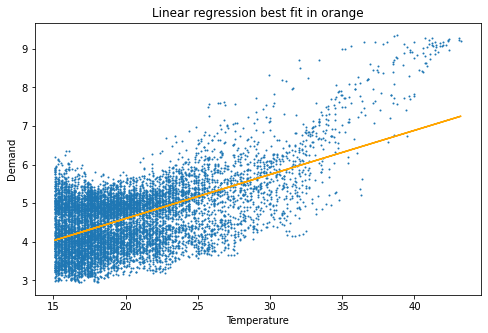

In [16]:
# We can plot them, too!
plt.figure(figsize = (8, 5))
plt.scatter(elec["temp"], elec["demand"], s=1)
plt.plot(elec["temp"], y_pred, color='orange')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.title('Linear regression best fit in orange');

### Q: Is the orange line above the same as what we got from sns.regplot() earlier?

Answer is Yes. Seaborn is doing the linear regression fit under the hood and plots the best fit line when called upon. But there are limitations on the functional expandability, like accessing model weights, applying methods like predict() and so on. 

---

Back to the slides!

---

### Step 6: Evaluation

We now want to see how good a job our model does at **predicting demand**. **Mean squared error** is a *popular scoring metric*. 

This is so as to confirm we are constructing a well-representative model close to actual behavior, so we can trust predictions made on future un-seen data - *this is the ground truth about working on a prediction task*

***Lower is better*** --> That's the case whenever "error" is in the metric name. Lower error --> more **accurate predictions** that closely depict actual performance

$$ MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum e_i^2 $$

#### MSE by hand: (that is, without tapping on sklearn)

In [17]:
# Create residuals (aka errors): (y - y_hat)
resids = y - y_pred

In [18]:
# Compute the MSE: mean(residuals**squared)
mse = np.mean(resids**2)
mse

0.5050316037069883

#### How does that model compare to our null model?

In [19]:
# Create the predictions for the "null model"
y_bar = np.mean(y)
y_bar # which is elec['demand'].mean() that we computed in the beginning

4.6245247308369555

In [20]:
# residuals for null model: difference between all values in y and y_bar (1 value only)
y - y_bar

0       -0.709878
1       -0.951975
2       -1.126986
3       -1.285380
4       -1.420212
           ...   
17515   -0.899689
17516   -0.862638
17517   -0.815110
17518   -0.488579
17519   -0.407478
Name: demand, Length: 9807, dtype: float64

In [21]:
# The null MSE with residuals from previous step
null_mse = np.mean((y - y_bar)**2)
null_mse

0.7796885466312027

<details><summary>(click) Which model fits the data better?</summary>
The OLS model has lower error. So, we would choose this over the null model.
</details>

- Another **popular regression metric** (used commonly in industry), is the $R^2$, which is defined as:

$$R^2 = 1 - \frac{\text{MSE}}{\text{Null MSE}} = 1 - \frac{\sum (y_i - \hat{y}_i)}{\sum (y_i - \bar{y})}$$

- The $R^2$, or **coefficient of determination**, is the ***proportion of variability in $y$ we can explain with $x$.***
    - In other words, $R^2$ = Explained variation / Total variation
    - R-squared is always between 0 and 100%:
        - 0% indicates that the model explains none of the variability of the response data around its mean.
        - 100% indicates that the model explains all the variability of the response data around its mean.
    - In general, the **higher the $R^2$**, the *better the model fits our data*

In [22]:
# The R2
1 - (mse / null_mse)

0.35226494490771165

#### Interpret $R^2$

35.2% of the **variability or fluctuation** in the _response_, `electricity demand` can be explained by the _feature_, `temperature` based on the computed $R^2$

#### We don't have to calculate these metrics by hand. `sklearn` can do it for us!
- using the other sklearn import we did in the beginning: _from sklearn import metrics_ 

In [23]:
# MSE - shift_tab to observe the order to pass the arguments - this is VERY crucial to follow!!
metrics.mean_squared_error(y, y_pred)

0.5050316037069877

In [24]:
# Can compute R2 from metrics...
metrics.r2_score(y, y_pred)

0.3522649449077143

In [25]:
# ... or alternative R2 computing directly from the model...
lr.score(X, y)

0.3522649449077143

### You made your first Linear Regression Model 🎉

---

To the slides!

---

## LINE Assumptions
Let's check em!

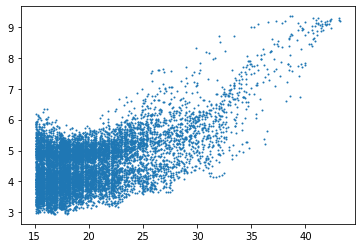

In [26]:
# L - Linearity
plt.scatter(elec["temp"], elec["demand"], s=1);

<details><summary>(click) Does this pass our L assumption?</summary>
It's definitely a little curved, but this looks okay for a baseline model
</details>

In [27]:
# I - Independence

<details><summary>(click) Does this pass our I assumption?</summary>
Yes, by assumption.
</details>

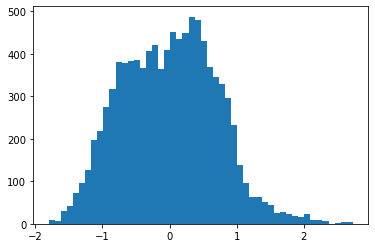

In [28]:
# N - Normality of errors
plt.hist(resids, bins=50);

<details><summary>(click) Does this pass our N assumption?</summary>
Just like with the Linearity assumption, this isn't great, but we might be able to get away with it.
</details>

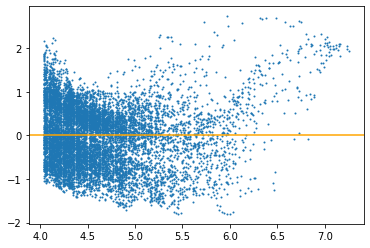

In [29]:
# E - Equal variance of errors
plt.scatter(y_pred, resids, s=1)
plt.axhline(0, color="orange");

<details><summary>(click) Does this pass our E assumption?</summary>
I'm gonna go with no on this one...
</details>

---

Back to the slides!

---

# Part II: Multiple Linear Regression

When you have more than 1 predictor variable you are doing _multiple linear regression_. 

## Bikeshare Data 🚴‍♂️
Data adapted from source: [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)


Multiple Linear Regression *(MLR, for short)* with Categorical Features

### Goal: predict the number of riders (count), based on the given features.

In [30]:
bike = pd.read_csv("../data/bikeshare.csv")
print(bike.shape) # remember to ALWAYS do this, as good practise!
bike.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Some preprocessing to clean things up:
1. Rename "count" to "riders"
2. Drop "casual" and "registered"
3. Drop rows where weather is 4
4. Cast "datetime" to actually be a datetime

In [31]:
# Some preprocessing:
# 1 - Rename "count" to "riders"
# 2 - Drop "casual" and "registered"
# 3 - Drop only rows where weather == 4
# 4 - Cast "datetime" to actually be a datetime
bike.rename(columns={"count": "riders"}, inplace=True) # solution 1
bike.drop(columns=["casual", "registered"], inplace=True) # solution 2
bike = bike[bike["weather"] != 4] # solution 3
bike["datetime"] = pd.to_datetime(bike["datetime"]) # solution 4

print(bike.shape) # we confirm that the 2 col drop has altered the df shape
bike.head()

(10885, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,riders
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [33]:
# 4 Seasons vs 12 Months in a year - getting a frequency table with pandas crosstab
pd.crosstab(bike["season"], bike["datetime"].dt.month)

datetime,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,883,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


### Ridership model
Let's try to ***predict the number of riders*** based on **temperature** and what **season** it is. We'll have to **one-hot encode** the *season* column!

- First, let's understand that our features are: temperature & season, and our response is: riders
- Why do we need to one-hot encode seasons? the values 1,2,3,4 numeric, right? and not appearing as winter, spring, fall, summer..
    - remember that when we say numeric, the characteristic of such variables are ***continuous***, they are not countable, like temperature, they have a "trend" in them
    - while categoric variables are ***discrete***, with no inherent trend amoungst the values they take - *each season is a stand-alone discrete value, so this falls under a categoric variable*

### Step 1: Assemble our predictor variables (X) and our target (y) 

In [33]:
# Dummify "season" - pd.get_dummies is the pandas option to do one-hot encoding
X = bike[["season", "temp"]] # get a subset_df with all col+values from season, temp cols
X = pd.get_dummies(data=X, columns=["season"], drop_first=True) # dropping season 1

y = bike["riders"]

In [34]:
X.head() # one-hot encoded X

,temp,season_2,season_3,season_4
0,9.84,0,0,0
1,9.02,0,0,0
2,9.02,0,0,0
3,9.84,0,0,0
4,9.84,0,0,0


In [37]:
X.columns

Index(['temp', 'season_2', 'season_3', 'season_4'], dtype='object')

### Step 2: Instantiate the model

In [35]:
model = LinearRegression()

### Step 3: Fit the model

In [36]:
# Fit model
model.fit(X, y)

LinearRegression()

### Step 4: Check out and interpret our coefficients

In [38]:
# Coefficients
model.coef_

array([  13.74269709,  -42.50544518, -105.32350516,   26.08224525])

In [46]:
# Python dict constructor has an ability to convert list of tuple to dict
# with key as first element of tuple and value as second element of tuple
dict(zip(X.columns, model.coef_))

{'temp': 13.742697091312182,
 'season_2': -42.505445177017265,
 'season_3': -105.32350516186077,
 'season_4': 26.08224524901449}

In [45]:
# above is the same as following a traditional looping approach
coef_dict = {}
for idx, val in enumerate(X.columns):
    coef_dict[val] = model.coef_[idx]
coef_dict

{'temp': 13.742697091312182,
 'season_2': -42.505445177017265,
 'season_3': -105.32350516186077,
 'season_4': 26.08224524901449}

#### Interpretation of coefficients
Now that we have multiple variables, our interpretations for one variable will be on the grounds of **holding all other variables constant**. 
> For every 1 unit increase in $x_i$, we expect $y$ to increase by $\beta_i$, holding all else constant.

Furthermore, each interpretation of a dummy variable is **in relation to the baseline** (in this case, season 1: Winter).

**Interpretation of $\hat{\beta}_3$ (`season_3` - Summer):**
Holding the temperature constant, the Summer season contributes to **105 fewer riders** per hour **relative to Winter**.

<details><summary>(click) Interpret the coefficient for temp.</summary>
Holding all else constant (which is all the seasons in this context), for every one-degree increase in temperature, we expect about 14 more riders per hour.
</details>

<details><summary>(click) Interpret the coefficient for season_4 (Fall).</summary>
Holding the temperature constant, the effect of it being Fall contributes to 26 more riders per hour relative to Winter.
</details>

### Step 5: Make predictions

In [49]:
y_preds = model.predict(X)
print(len(y_preds))
y_preds

10885


array([ 79.3287384 ,  68.05972679,  68.05972679, ..., 161.75604173,
       161.75604173, 150.48703011])

### Step 6: Evaluate the model

In [50]:
# R2:
metrics.r2_score(y, y_preds)

0.1924098470418396

In [51]:
# MSE:
metrics.mean_squared_error(y, y_preds)

26499.652172172042

<details><summary>(click) How is our model?</summary>
Overall, this model isn't great. Based on the $R^2$ that we got, only about 20% of the variation in ridership can be explained by the model.
</details>

So our model is pretty bad. How much should we trust our interpretation for the coefficients?
> Do our LINE assumptions hold?

When working with *multiple linear regression*, we add a secret **5th** "assumption" to our LINE assumptions that is usually violated at least a little. 
- This is to check for ***Multicollinearity*** which occurs when two or more independent variables are highly correlated with one another

### LINEM
- L - Linear relationship
- I - Independent errors
- N - Normally distributed errors
- E - Equal variance of errors (homoscedasticity)
- M - No Multicollinearity/Independence of Predictors

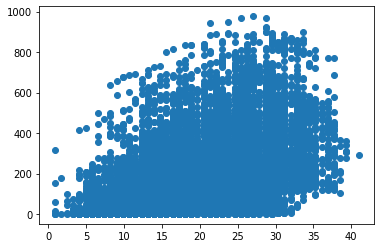

In [51]:
# L:
# with scatter we can only visualize one X vs y like below
plt.scatter(X['temp'], y);

In [59]:
# but we have multiple X - seasons and temp
# recall that we dropped season 1 from X
# take a look to revisit what is in y and X again - notice the index in both prints                                             
print(f'y is:\n{y.head()}')
print("\n X is:")
X.head()

y is:
0    16
1    40
2    32
3    13
4     1
Name: riders, dtype: int64

 X is


,temp,season_2,season_3,season_4
0,9.84,0,0,0
1,9.02,0,0,0
2,9.02,0,0,0
3,9.84,0,0,0
4,9.84,0,0,0


In [61]:
# the final subset dataset used for modeling can be combined as below using the indexes
# alternative to activating left_index and right_index in merge() would be to merge using join()
pd.merge(X, y, left_index = True, right_index = True).head()

,temp,season_2,season_3,season_4,riders
0,9.84,0,0,0,16
1,9.02,0,0,0,40
2,9.02,0,0,0,32
3,9.84,0,0,0,13
4,9.84,0,0,0,1


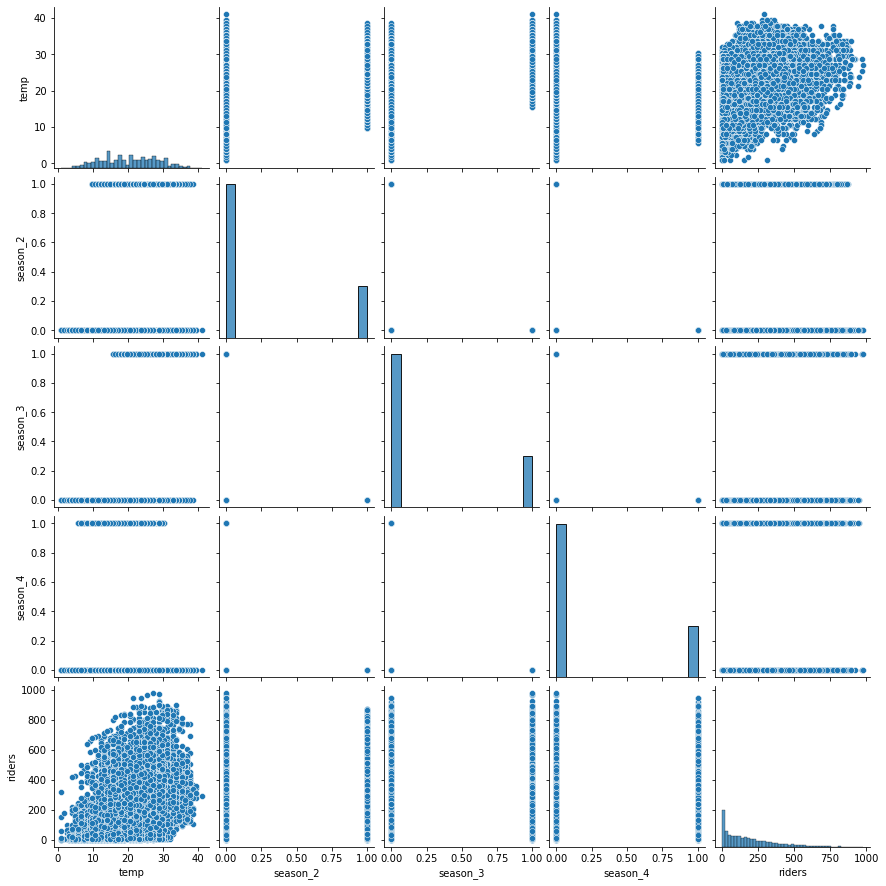

In [62]:
# seaborn pairplot() Plots pairwise relationships in a dataset (google documentation for more details)
# creates a grid of Axes shared amongst the numeric variables in the dataset 
# diagonals are distribution plots
# example: temp vs riders scatter plot is in (0,4) that is, row 0 & column 4
sns.pairplot(pd.merge(X, y, left_index = True, right_index = True));

[seaborn.pairplot documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Inferences for L:
- only temp seems to have be somewhat linearly correlated with riders

In [63]:
# I:
# assumed
# although this is probably violated since this is time-series data

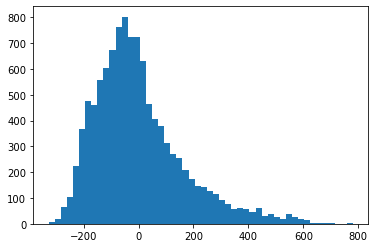

In [64]:
# N: yes, this does look somewhat normally distributed
resids = y - y_preds
plt.hist(resids, bins=50);

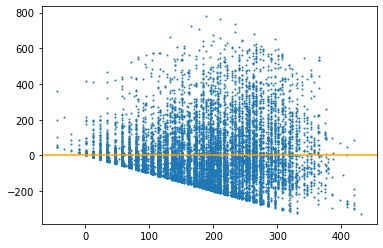

In [65]:
# E: there seems to be some sort of a pattern here with dropping residuals at higher y_preds
# thus, not entirely random
plt.scatter(y_preds, resids, s=1)
plt.axhline(0, color="orange");

In [66]:
# M/I:
# Honestly, temperature might be a little correlated with season, but not enough to be worried
# let's exercise the corr() functionality we've used before to test for correlations
# this function Compute pairwise correlation of columnss & returns correlation coeff
X.corr()

,temp,season_2,season_3,season_4
temp,1.000000,0.192603,0.635972,-0.266335
season_2,0.192603,1.000000,-0.335255,-0.335337
season_3,0.635972,-0.335255,1.000000,-0.335337
season_4,-0.266335,-0.335337,-0.335337,1.000000


##### Our table is concise with less features, so we straightaway see temp is strongly correlated with season_3 - Summer! We can use a heatmap to visualize

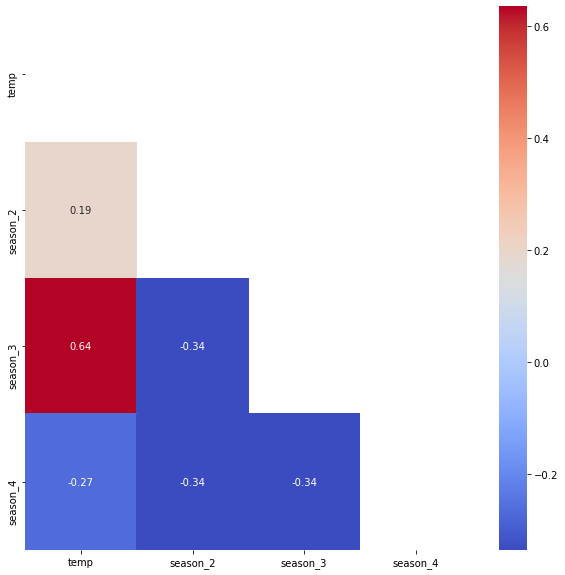

In [68]:
mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    X.corr(),
    cmap='coolwarm',
    annot=True,
    mask = mask
);

Yikes! We should probably not say anything very strong about the coefficients in our interpretation. 

## NOW YOU

Let's make a better model.

Now your turn: Fit a model that, this time, uses _ALL_ X-variables (excluding `atemp`) as well as the **the hour of day**. One-hot encode columns accordingly.

In [69]:
# recap what's in our dataframe
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,riders
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [70]:
# create new feature "hour" from available feature "datetime"
bike["hour"] = bike["datetime"].dt.hour
bike.columns # we confirm "hour" column is added

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'riders', 'hour'],
      dtype='object')

In [73]:
# define list of X-features to subset from "bike" for modeling
xvars = [
    "season", "holiday", "workingday",
    "weather", "temp", "humidity",
    "windspeed", "hour"
]
# final X
X = bike[xvars]
X = pd.get_dummies(columns=["season", "weather", "hour"], data=X, drop_first=True)

##### Let's think about why "hour" needs to be one-hot encoded?

In [74]:
bike['hour'].unique() # discrete, countable

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [75]:
bike['weather'].unique() # discrete, countable

array([1, 2, 3], dtype=int64)

In [76]:
X.head()

,holiday,workingday,temp,humidity,windspeed,season_2,season_3,season_4,weather_2,weather_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,81,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,80,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,80,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,75,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,75,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y = bike['riders']

In [78]:
# instantiate and fit model
model_big = LinearRegression()
model_big.fit(X, y)

LinearRegression()

In [79]:
# evaluate model with R-squared metric
model_big.score(X, y)

0.6321452699700185

WoooooooW! This model is a big improvement compared to the previous one constructed with just season & temp. 
Now, we can explain about 63% of the fluctation in the riders (response) based on the features used in modeling.

# Additional, not-really-BONUS topics

## ANRBT #1: Multicollinearity
Multicollinearity occurs when you have **two or more $x$-variables that are correlated with each other**. This phenomenon doesn't affect the quality of the model fit, but it completely destroys model inference (ie, confidence intervals and hypothesis tests). In addition, it can also contribute to a **rank-deficient matrix**, meaning the model can't be fit at all!

In [80]:
# this is the numpy equivalent to pandas corr(). returns pearson corr coef
# it is confirmed temp & atemp exhibit Multicollinearity! 
np.corrcoef(bike.temp, bike.atemp)

array([[1.        , 0.98494541],
       [0.98494541, 1.        ]])

In [81]:
# the same inference with pandas corr()
bike[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.984945
atemp,0.984945,1.000000


## ANRBT #2: The Curse of Dimensionality
It turns out that the more variables we add to our model, the better it is. Actually, it doesn't even matter what this variable was, that will always be true. Even if it's completely irrelevant. That is, if we added the following variables to our model:

* Is there a sunspot on this day?
* The closing stock price of Apple that day.
* Whether or not Guy Fieri had pancakes for breakfast that day.
* A column of completely random standard normal variables

Our model is **guaranteed** to get better. But it isn't _really_ a better model, right? It turns out, we're modeling **noise**, not **signal**. 
- Very quickly - Gathering a huge number of data may lead to the _dimensionality problem_ with fewer pieces of information _really beneficial_ for modeling. Simply put, we'll run into classic machine learning problems like an overfit model, when If we have more features than our observations. More simply put, more columns than rows.


We'll talk more about this phenomenon later.

## ANRBT #3: Matrix Notation and Solution
_Foundation knowledge check:_ Transpose here is simply how we are familiar with using it in Excel, change from long to wide format.

Recall our matrix notations:

$$
\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \cdots & y_n \end{bmatrix}^T
$$

$$
\beta = \begin{bmatrix} \beta_0 & \beta_1 & \cdots & \beta_p \end{bmatrix}^T
$$

$$
\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p} \\
1 & x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{np} \\ 
\end{bmatrix}
$$

It then works out we can write our model as:

$$\mathbf{y} = \mathbf{X}\beta + \varepsilon$$

Which makes our solution:

$$\mathbf{\hat{y}} = \mathbf{X}\hat{\beta}$$

where

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

Look confusing? It is! It haunts the dreams of second-year grad students. But it's not _too_ mysterious. If you'd like to understand it better, check out the **numpy ladder challenge**. Really, the take away here is singular:

### **The solution to our problem exists in closed form and can be computed by simple _matrix multiplication_. So, we can rest in peace knowing that the computer isn't doing some magic in the background. It's all just math!**

## ANRBT #4: The `statsmodels` Library
Scikit-Learn does not hold the monopoly in doing linear regression in Python. In fact, you may even like this better!

In [82]:
# let's use back our elec dataset
elec.head()

,demand,workday,temp
0,3.914647,0,18.2
1,3.672550,0,17.9
2,3.497539,0,17.6
3,3.339145,0,16.8
4,3.204313,0,16.3


In [83]:
import statsmodels.api as sm

X = elec[["temp", "workday"]]
X = sm.add_constant(X) # remember that unlike scikit-learn, statsmodels needs this to be explicitly specified
y = elec["demand"]
ols = sm.OLS(y, X).fit()

In [84]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5311.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:10:55   Log-Likelihood:                -9095.8
No. Observations:                9807   AIC:                         1.820e+04
Df Residuals:                    9804   BIC:                         1.822e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7821      0.029     60.732      0.000       1.725       1.840
temp           0.1145      0.001     85.071      0.000       0.112       0.117
workday        0.7768      0.013     58.541      0.000       0.751       0.803
==============================================================================
Omnibus:                       59.454   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.490
Skew:                           0.060   Prob(JB):                     7.42e-19
Kurtosis:                       3.436   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusions and Takeaways:
* Machine learning, aka statistical modeling, is an important and vast topic we'll spend much of our course exploring. It comes in many varieties for different situations.
* Linear regression is a **supervised "white-box" regression model**.
* As far as machine learning goes, OLS is very simple, yet still powerful.
* One of its more enticing feature is that its **coefficients are interpretable!**
* In the midst of all this, we learned how to handle dummy variables, something important for all of the models we'll learn about.